In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df=pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.shape
#cell_df.size
#cell_df.count()
#cell_df['Class'].value_counts()

(699, 11)

In [3]:
from IPython.display import display
pd.options.display.max_columns = None
#pd.set_option('display.max_columns', None)
display(cell_df.head())

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


##### Dristibution of Classes

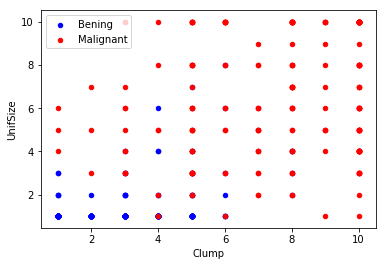

In [4]:
# 4= malignant , 2= benign
benign_df=cell_df[cell_df['Class']==2][0:200]
malignant_df=cell_df[cell_df['Class']==4][0:200]

#help(benign_df.plot)
axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Bening')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant',ax=axes)

#### Identifying Unwanted rows

In [5]:
cell_df.dtypes

cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.shape
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

#### Remove Unwanted Columns

In [6]:
cell_df.columns

feature_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#feature_df.shape
#type(feature_df)

#independent variable
x=np.asarray(feature_df)

#dependent variable
y=np.asarray(cell_df['Class'])

x[0:5]
y.shape

(683,)

### Divided the data as Train/Test dataset

In [7]:
"""cell_df (100)-->Train(80 rows)/Test(20 rows)
Train(X,y) ## X itself is a 2D array. ## y is 1D
Test(X,y)
"""
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
#A,B,C,D=train_test_split(x,y,test_size=0.2,random_state=4)
x_train.shape #(546, 9)
x_test.shape # (137, 9)
y_train.shape #(546,)
y_test.shape #(137,)

(137,)

### Modeling (SVM with Scikit Learn)

In [8]:
from sklearn import svm

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

### Evaluation (Results)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
